# Day 1 Programming Lab 1 Exercises

The exercises will not count towards your course mark, but they provide you with an opportunity to receive feedback on your programming skills in advance of you completing your summative assignments.

The goal of the following exercises is to make you apply the concepts and general methods seen in Day 2 of the Bootcamp and develop Python scripts to perform basic programming tasks.

## Regression

In this exercise will allow you to apply linear regression, multiple linear regression

In [106]:
# Please uncomment the following lines to install the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

### Linear Regression

To complete this task you need to download the Day 2_Programming Lab 2_Exercises Dataset 1.csv from Canvas, then read the dataset into a pandas dataframe. Print the first 10 rows of the dataframe 

In [107]:
data = pd.read_csv("Day 1_Programming Lab 1_Exercises Dataset 1.csv")

data.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


Use the describe method to provide a description of the dataframe

In [108]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Create a new dataframe containing the 'ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS' feature, then use head() method to print the first 5 rows f the new dataframe

In [109]:
data_subset = data[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

data_subset.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


Create 3 scatter plots to visualise each of these features against the CO2EMISSIONS. Assign the CO2EMISSIONS to the vertical axis in all 3 plots

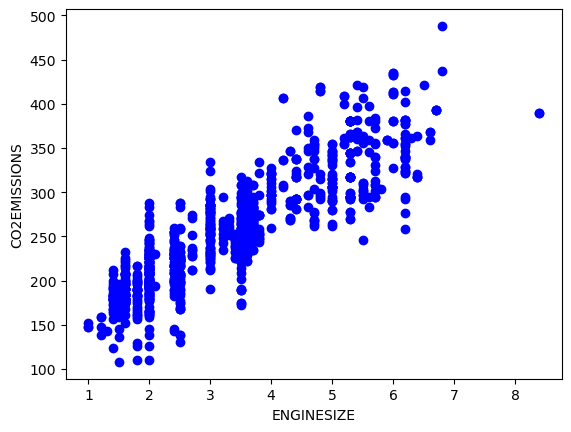

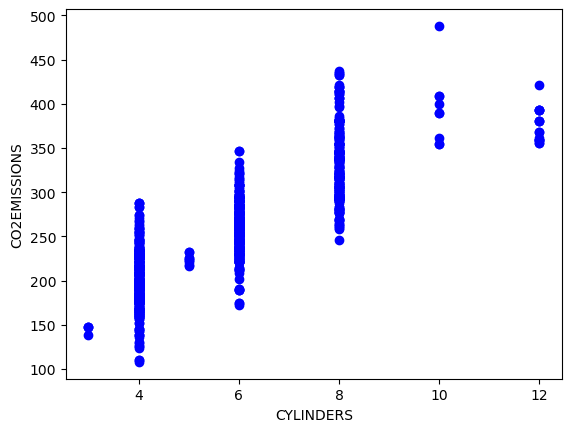

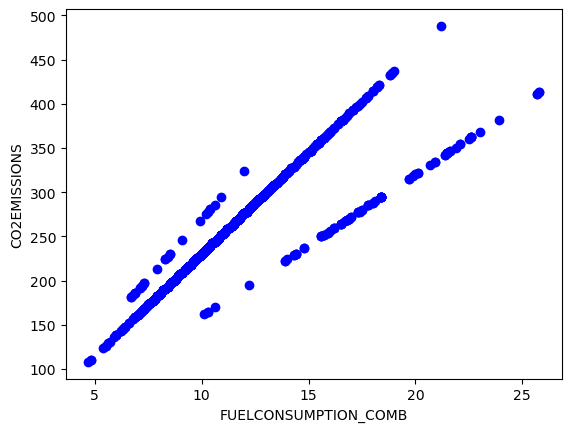

In [110]:
for column in data_subset.columns:
    if column != 'CO2EMISSIONS':
        plt.scatter(data_subset[column], data_subset['CO2EMISSIONS'], color='blue')
        plt.xlabel(column)
        plt.ylabel('CO2EMISSIONS')
        plt.show()

Use the np.random.rand() function to create a mask used to randonly split the data into training and testing sets with a ratio 0.8:0.2 respectively

In [111]:
msk = np.random.rand(len(data_subset)) < 0.8
train = data_subset[msk]
test = data_subset[~msk]
print("Training set rows:", train.shape[0])
print("Testing set rows:", test.shape[0])

Training set rows: 845
Testing set rows: 222


Import a linear model from skLearn library 

In [112]:
import sklearn.linear_model as sklm
import sklearn.metrics as skm

Train the linear model to find the coefficient and the intercept of the fit line between on ENGINESIZE and CO2EMISSIONS using x-train and y-train sets

In [113]:
regr = sklm.LinearRegression()
x = train[['ENGINESIZE']]
y = train[['CO2EMISSIONS']]

regr.fit(x, y)
print('Coefficients: ', regr.coef_[0][0])
print('Intercept: ', regr.intercept_[0])

Coefficients:  38.174546692538236
Intercept:  127.84150633527554


Evaluate your model using x-test and y-test sets, then calculate the Mean Squared Error and the R squared value

In [114]:
r_sqr = skm.r2_score(test['CO2EMISSIONS'], regr.predict(test[['ENGINESIZE']]))
print(f'R squared score: {r_sqr:.2f}')

mse = skm.mean_squared_error(test['CO2EMISSIONS'], regr.predict(test[['ENGINESIZE']]))
print(f'Mean squared error: {mse:.2f}')

R squared score: 0.75
Mean squared error: 1095.87


### Mutiple Linear Regression

Create a numpy array using asanarray method containing 'ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB' columns 

In [115]:
array = np.asanyarray(data_subset[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB']])

Use the np.random.rand() function to create a mask used to randonly split the data into training and testing sets with a ratio 0.8:0.2 respectively

In [116]:
array_train = array[msk]
array_test = array[~msk]

print("Training set rows:", array_train.shape[0])
print("Testing set rows:", array_test.shape[0])

Training set rows: 845
Testing set rows: 222


Pass all the features in the np array to train the linear model

In [117]:
regr = sklm.LinearRegression()
regr.fit(array, data_subset[['CO2EMISSIONS']])

LinearRegression()

Train the linear model to find the coefficient and the intercept of the fit line between all the 3 features and CO2EMISSIONS using x-train and y-train sets

In [118]:
print('Coefficients: ', regr.coef_[0])
print('Intercept: ', regr.intercept_[0])

Coefficients:  [10.85524041  7.51622501  9.59563161]
Intercept:  65.22328417194561


Evaluate the accuaracy of your multiple linear regression model by calculating the Residual Sum of Square Error

In [119]:
r_sqr = skm.r2_score(data_subset['CO2EMISSIONS'], regr.predict(array))
print(f'R squared score: {r_sqr:.2f}')

R squared score: 0.86


## KNN

The aim of this exercise is to apply K-nearest Neighbour classification algorithm. To complete this task you need to download the Day2_Programming Lab 2_Exercises Dataset 2.csv from Canvas, then read the dataset into a pandas dataframe. Print the first 10 rows of the dataframe 

In [120]:
# Please provide your solution here
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing


Use the sample method to randomly shuffle the dataframe, then create an array for the features (input) ['Sweep Direction', 'Distance','Time'] and another array for the output. Print the first 5 rows of the input and the output arrays 

In [121]:
data = pd.read_csv("Day 1_Programming Lab 1_Exercises Dataset 2.csv")

input = np.asanyarray(data[['Sweep Direction', 'Distance','Time']])
output = np.asanyarray(data[['Location']])

print(input[0:5])
print(output[0:5])

[[  0.         15.        116.90625  ]
 [  0.         15.        116.9089355]
 [  0.         15.        116.9091797]
 [  0.         15.        116.9121094]
 [  0.         15.        116.9121094]]
[['Extreme left']
 ['Extreme left']
 ['Extreme left']
 ['Extreme left']
 ['Extreme left']]


Scale the input array to unit variance using the StandardScaler then print the first five rows of the input.

In [122]:
input = preprocessing.StandardScaler().fit(input).transform(input.astype(float))
print(input[0:5])

[[-0.99796892 -1.26365006 -0.09586917]
 [-0.99796892 -1.26365006 -0.0958228 ]
 [-0.99796892 -1.26365006 -0.09581859]
 [-0.99796892 -1.26365006 -0.095768  ]
 [-0.99796892 -1.26365006 -0.095768  ]]


Use the train_test_split to split the input and output arrays to training and testing sets with a ration 0.8:0.2 repectively, then print the shape of the input and output arrays

In [123]:
input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.2, random_state=4)

print("Training set rows:", input_train.shape[0])
print("Testing set rows:", input_test.shape[0])

Training set rows: 12984
Testing set rows: 3247


Train a KNN model using k = 5 using the training and testing sets

In [136]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(input_train, output_train.ravel())

KNeighborsClassifier(n_neighbors=4)

Test your KNN model using the testing set 

In [137]:
output_pred = knn.predict(input_test)

Print the accuracy value and a classification report for your model

In [138]:
accuracy = np.mean(output_pred == output_test)*100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 16.87%


## PCA

The aim of this exercise is to understand how PCA can be used for dimensionality .reduction.
In this exercise we will use the digits dataset from the sclearn digits library. The digit dataset is made up of 1797 8x8 images. Each image is of a hand-written digit. 

In [127]:
# Uncomment the following lines to import the  libraries required for this exercise
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import decomposition

# Uncomment the following line to download the digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

The 8x8 figures are represented by a feature vector with length 64. We will reduce the dimentionality of the feature vector to 2 using PCA.

C:\Users\339755\AppData\Local\Temp\ipykernel_26976\979403821.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(XReduced[:, 0], XReduced[:, 1], c=y, cmap=plt.cm.get_cmap('nipy_spectral', 10))


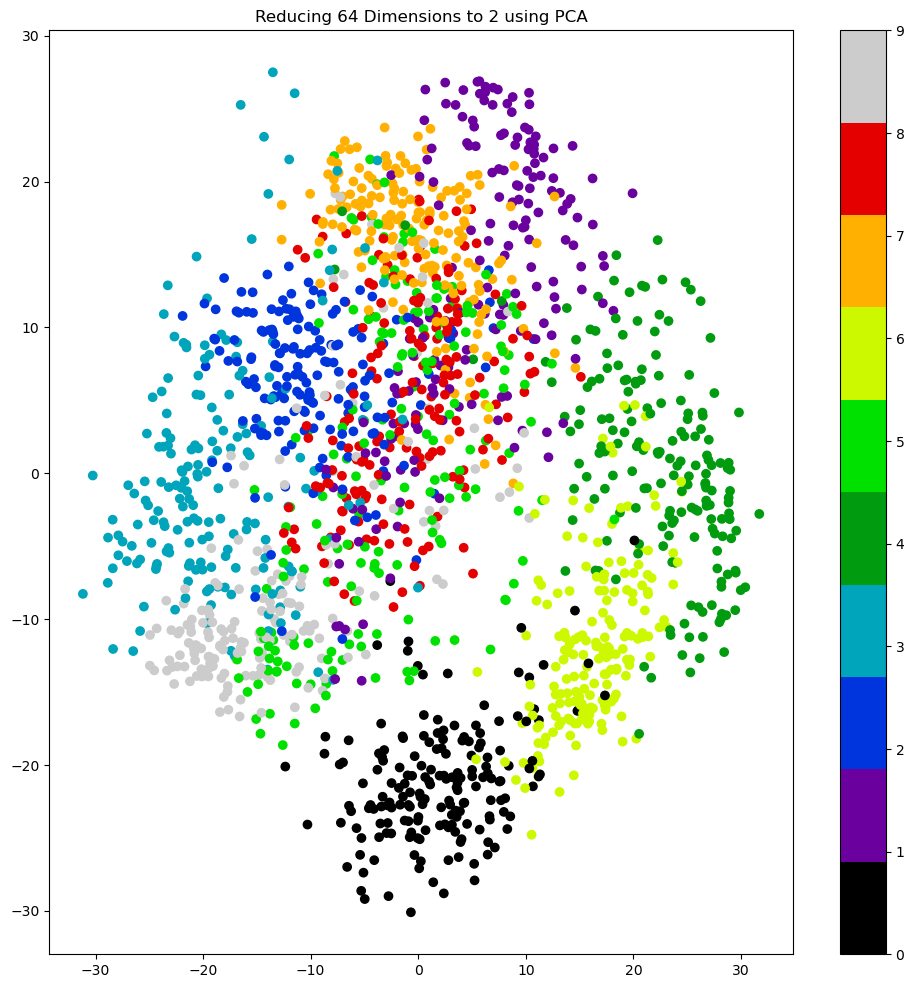

In [130]:
# Uncomment and analyse the following lines to conduct PCA reduction from 64 to 2
pca = decomposition.PCA(n_components=2)
XReduced = pca.fit_transform(X)

plt.figure(figsize=(12,12))
plt.scatter(XReduced[:, 0], XReduced[:, 1], c=y, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('Reducing 64 Dimensions to 2 using PCA');

C:\Users\339755\AppData\Local\Temp\ipykernel_26976\1241382256.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(XReduced[:, 0], XReduced[:, 1], XReduced[:, 2], c=y, cmap=plt.cm.get_cmap('nipy_spectral', 10))
c:\conda-data\envs\uni\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


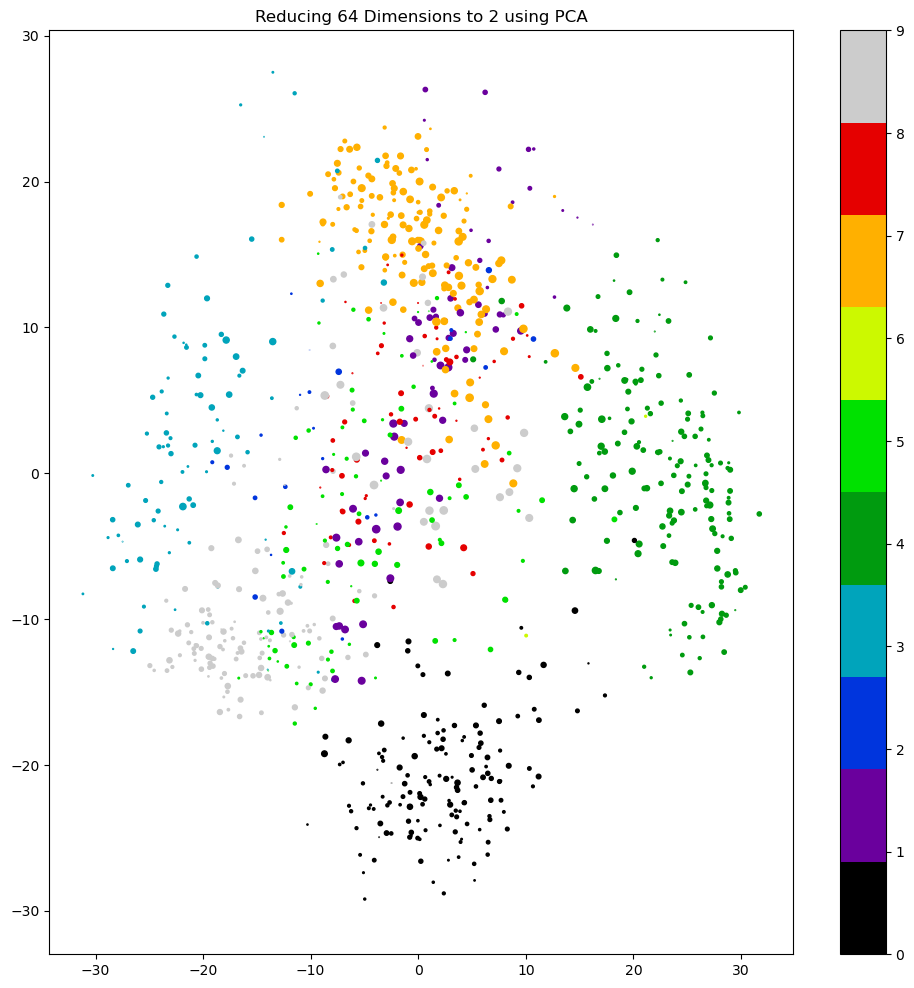

In [131]:
# Uncomment and analyse the following lines to conduct PCA reduction from 64 to 2
pca = decomposition.PCA(n_components=3)
XReduced = pca.fit_transform(X)

plt.figure(figsize=(12,12))
plt.scatter(XReduced[:, 0], XReduced[:, 1], XReduced[:, 2], c=y, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('Reducing 64 Dimensions to 2 using PCA');

In practice, we usually choose the number of principal components such that we can maitain 95% of the initial data dispersion (via the explained_variance_ratio). That means retaining 28 principal components from the original 64; therefore, we reduce the dimensionality from 64 features to 28 without significantly affecting our data.

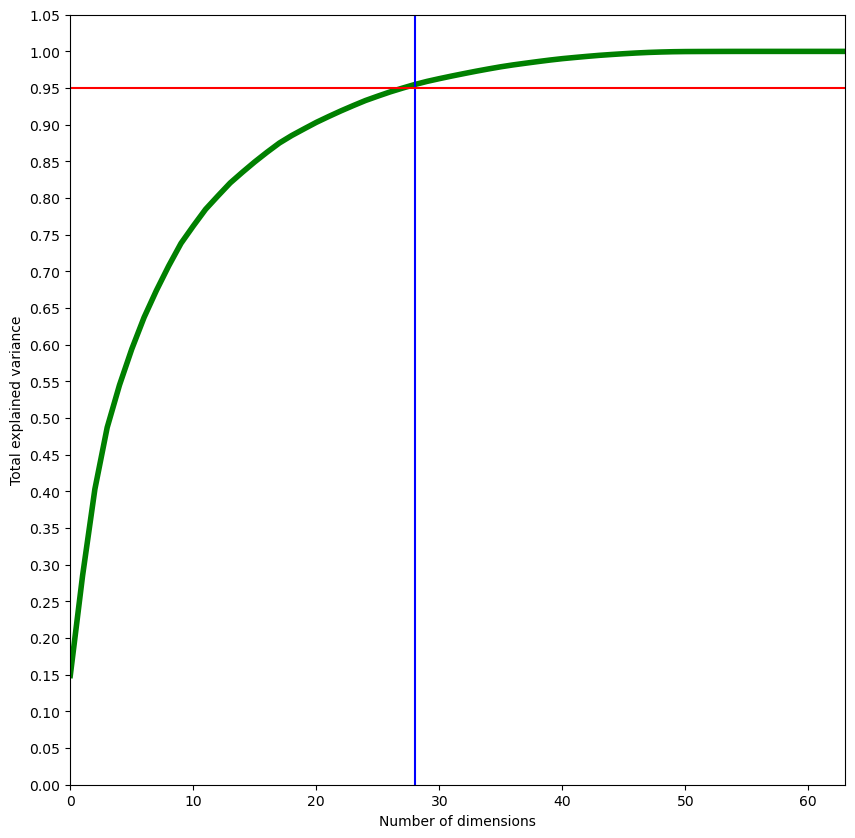

In [132]:
# Uncomment and run the following code then analyse the outcome.
pca = decomposition.PCA().fit(X)

plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='g', lw=4)
plt.xlabel('Number of dimensions')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.05))
plt.axvline(28, c='b')
plt.axhline(0.95, c='r')
plt.show();

Reduce the dimensions of the digits dataset from 64 to 3, then create a scatter plot for the 3 principle components

In [135]:
# Please provide your solution here
import plotly.express as px

pca = decomposition.PCA(n_components=3)
XReduced = pca.fit_transform(X)

px.scatter_3d(XReduced, x=0, y=1, z=2)